# Optional Assignment $\mathbb 1$

## Statement
Given the IVP $u' = f(u, t) = \cfrac{u^2+u}{t}$ 
over the interval $t \in [1, 5]$ with initial value $u(1) = -2$, we are asked to appoximate...

We know that the solution to this ODE is $u(t) = \cfrac{2t}{1-2t}$

Import libraries

In [47]:
import math, matplotlib.pyplot as plt

Define functions

In [48]:
def exact_solution(u: callable, a: float, b: float, k: float) -> float:
    N = math.ceil((b-a)/k) + 1
    k = (b-a)/N
    
    y = []
    for i in range(N):
        y.append(u(a+i*k))
    return y

def newton_method(f: callable, f_prime: callable, u0: float, tolerance: float, max_iterations: int) -> float:
    """Newton's Method to find the root of a function"""
    u1 = u0
    for i in range(max_iterations):
        fx = f(u1)
        fpx = f_prime(u1)
        if abs(fpx) < tolerance:  # Avoid division by zero
            raise ValueError("Derivative is too small; method fails.")
        x_new = u1 - fx / fpx
        if abs(x_new - u1) < tolerance:  # Check for convergence
            return x_new
        u1 = x_new
    raise ValueError("Method did not converge within the maximum iterations.")

In [49]:
def forward_euler(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Forward Euler Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    ui, ti = ui + k*f(ui, ti), ti+k
    u.append(ui)

  return u

def backward_euler(f: callable, f_prime: callable, tolerance: float, max_iterations: int, a: float, b: float, k: float, u0: float) -> list[float]:
  """Backward Euler Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    ui, ti = newton_method(lambda x: x-ui-k*f(x,ti+k), lambda x: 1-k*f_prime(x,ti+k), ui, tolerance, max_iterations), ti+k
    u.append(ui)
  return u

def explicit_trapezoidal(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Trapezoidal Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + k*f(ui, ti)
    ui, ti = ui + (k/2)*(f(ui, ti) + f(aux_u, ti+k)), ti+k
    u.append(ui)

  return u

def explicit_midpoint(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Explicit Midpoint Runge-Kutta 2 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    aux_u = ui + (k/2)*f(ui, ti)
    ui, ti = ui + k*f(aux_u, ti + k/2), ti+k
    u.append(ui)
  return u

def heun_rk3(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Heun's Runge-Kutta 3 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    f1, f2 = f(ui, ti), f(ui + k*f(ui, ti), ti+k)
    ui, ti = ui + (k/2)*(f1+f2), ti+k
    u.append(ui)
  return u

def rk4(f: callable, a: float, b: float, k: float, u0: float) -> list[float]:
  """Standard Runge-Kutta 4 Method"""
  N = math.ceil((b-a)/k) + 1
  k = (b-a)/N

  u = [u0]
  ui, ti = u0, a
  for _ in range(N-1):
    y1 = ui 
    y2 = ui + (k/2)*f(y1, ti)
    y3 = ui + (k/2)*f(y2, ti+k/2)
    y4 = ui + k*f(y3, ti+k/2)
    f1, f2, f3, f4 = f(y1, ti), f(y2, ti + k/2), f(y3, ti+k/2), f(y4, ti+k)
    ui, ti = ui + (k/6)*(f1+2*f2+2*f3+f4), ti+k
    u.append(ui)
  return u

## Resolution

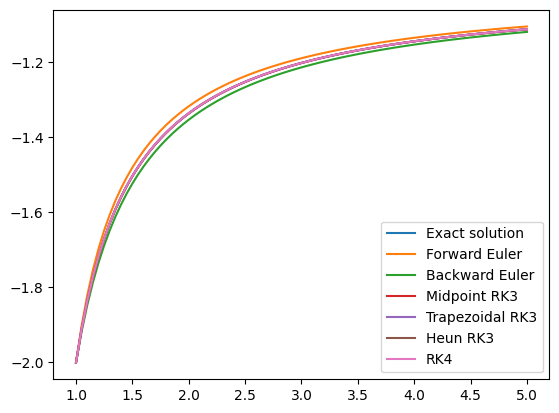

In [ ]:
# Definition of the IVP problem and initial values
f = lambda u,t: (u**2+u)/t
f_prime = lambda u,t: (2*u+1)/t
u = lambda t: (2*t)/(1-2*t)
delta = lambda k: 1/(5*2**k)
a, b, k, u0 = 1, 5, delta(0), -2

# Compute the solutions using the different methods
x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]
plt.plot(x_points, exact_solution(u, a, b, k), label='Exact solution')
plt.plot(x_points, forward_euler(f, a, b, k, u0), label='Forward Euler')
plt.plot(x_points, backward_euler(f, f_prime, 0.0001, 10, a, b, k, u0), label='Backward Euler')
plt.plot(x_points, explicit_midpoint(f, a, b, k, u0), label='Midpoint RK3')
plt.plot(x_points, explicit_trapezoidal(f, a, b, k, u0), label='Trapezoidal RK3')
plt.plot(x_points, heun_rk3(f, a, b, k, u0), label='Heun RK3')
plt.plot(x_points, rk4(f, a, b, k, u0), label='RK4')
plt.legend()
plt.show()

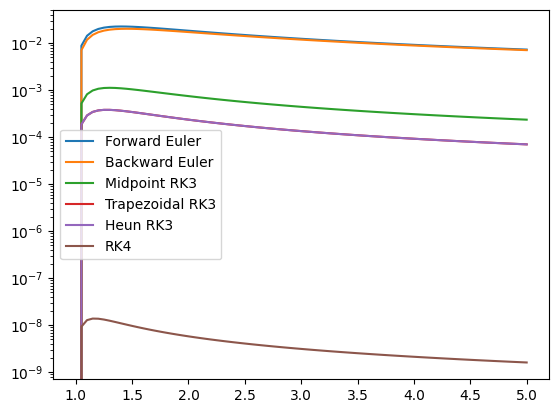

In [51]:
# Compute the solutions using the different methods
error = lambda u, v: [abs(u[i]-v[i]) for i in range(len(u))]

x_points = [a+k*i for i in range(math.ceil((b-a)/k)+1)]
y_points = exact_solution(u, a, b, k)
y_feuler = forward_euler(f, a, b, k, u0)
y_beuler = backward_euler(f, f_prime, 0.0001, 10, a, b, k, u0)
y_midpoint = explicit_midpoint(f, a, b, k, u0)
y_trapezoid = explicit_trapezoidal(f, a, b, k, u0)
y_heun = heun_rk3(f, a, b, k, u0)
y_rk4 = rk4(f, a, b, k, u0)

plt.semilogy(x_points, error(y_points, y_feuler), label='Forward Euler')
plt.semilogy(x_points, error(y_points, y_beuler), label='Backward Euler')
plt.semilogy(x_points, error(y_points, y_midpoint), label='Midpoint RK3')
plt.semilogy(x_points, error(y_points, y_trapezoid), label='Trapezoidal RK3')
plt.semilogy(x_points, error(y_points, y_heun), label='Heun RK3')
plt.semilogy(x_points, error(y_points, y_rk4), label='RK4')
plt.legend()
plt.show()
